This note is for building strtergy for weekly option buy  
Rules 
Version 1 

buy weekly option on Friday - Call and Put both on Future open strike price
Sell both bought options on weekly expirty at closing price 

Version 2 

buy weekly option on Monday - Call and Put both on Future open strike price
Sell both bought options on weekly expirty at closing price 



Algo Steps

using nsepy

1) find out all expirty date from 2017 (weekly options was logically good values from 2017)
2) check day (in case thursday is holiday)
3) check if options is in buy status on previous Friday 
4) yes then sell options on that day
5) if this is first time  - check next working day (logically friday )
6) Check future price on the friday 
7) identiy ATM strike price
8) Buy CE and PE for that week 
9) Go to next expiry sell both the option
10) find P&L
11) Find max draw down
12) find CAGR
14) Find AGR


In [1]:
import pandas as pd
import numpy as np
import nsepy 
import os
from datetime import datetime ,date,timedelta
import datetime
from dateutil.relativedelta import *
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 15)
pd.set_option('display.width', 1000)
%matplotlib inline

In [2]:
def getExpirtyDate():
    expirty_Date  =[]
    start_date = datetime.date(2017, 1, 1)
    end_date = datetime.date(2021, 4, 30)
    delta = relativedelta(months=+1)
    while start_date <= end_date: 
        #max(nsepy.get_expiry_date(start_date.year,start_date.month)))
        #expirty_Date.extend(sorted(list(nsepy.get_expiry_date(start_date.year,start_date.month))))
        expirty_Date.append(max(nsepy.get_expiry_date(start_date.year,start_date.month)))
        start_date += delta
    return expirty_Date
              

In [3]:
def getStrikeValue():
    symbol = 'NIFTY'
    expiry_list = getExpirtyDate()
    previous_expiry_date = expiry_list[200]
    current_expiry_date = expiry_list[203]
    print(previous_expiry_date)
    print(current_expiry_date)
    #identiy next working day after previous expiry day
    start_date = previous_expiry_date+timedelta(days =1)
    print(start_date)

    nifty_fut = nsepy.get_history(symbol="NIFTY",
                            start=start_date,
                            end=start_date,
                            index=True,
                            futures=True,
                            expiry_date=current_expiry_date)
    print(nifty_fut)

In [4]:
database = "C:/Users/sanjo/PycharmProjects/mokshtech/stock_predictor/database/optionData"

In [5]:
    print(os.getcwd())
    print(os.listdir())
    symbol = 'BANKNIFTY'
    banknifty = pd.DataFrame()
    formatted_banknifyt_df = pd.DataFrame(['Year_month','P&L'])
    month_profit_loss = pd.DataFrame()
    start_date = datetime.date(2018, 1, 1)
    end_date = datetime.date(2021, 4, 30)
    delta = relativedelta(years=+1)

    year_month_list =[]
    p_N_L_list =[]
    cum_p_N_L_list =[]
    slipage = 5

    while start_date <= end_date:
            val =0
            print(str(symbol)+str(start_date.year)+".csv")
            filename = str(symbol)+str(start_date.year)+".csv"
            fname = os.path.join(database,filename)
            fname_day = os.path.join(database,filename)
            df = pd.read_csv(fname)
            df = df.loc[df['SYMBOL']== symbol]
            df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%Y-%m-%d')
            df['Year_month'] = pd.to_datetime(df['Date']).dt.strftime('%Y-%m')
            df['EXPIRY_DT'] = pd.to_datetime(df['EXPIRY_DT']).dt.strftime('%Y-%m-%d')
            df['EXPIRY_DT_Year_month'] = pd.to_datetime(df['EXPIRY_DT']).dt.strftime('%Y-%m')
            formatted_banknifyt_df = df[ df['Year_month'] == df['EXPIRY_DT_Year_month'] ]
            banknifty = banknifty.append(df)
            start_date += delta

    banknifty_option_df = banknifty[banknifty['INSTRUMENT']=='OPTIDX']
    banknifty_fut_df = banknifty[banknifty['INSTRUMENT']=='FUTIDX']
    
    

print(banknifty_fut_df)

C:\Users\sanjo\PycharmProjects\mokshtech\stock_predictor\optionvaluecalculation\strategies
['.ipynb_checkpoints', 'df.csv', 'forwordvolatility.py', 'input.csv', 'monthlyoptionbuying.ipynb', 'NIFTY.csv', 'preDefinedStrategies', 'straddle.py', 'strategies.py', 'weeklyOptionBuy.ipynb', '__init__.py']
BANKNIFTY2018.csv
BANKNIFTY2019.csv
BANKNIFTY2020.csv
BANKNIFTY2021.csv
              Date INSTRUMENT     SYMBOL   EXPIRY_DT  STRIKE_PR OPTION_TYP      OPEN  ...  SETTLE_PR  CONTRACTS  VAL_INLAKH   OPEN_INT  CHG_IN_OI  Year_month  EXPIRY_DT_Year_month
0       2018-01-01     FUTIDX  BANKNIFTY  2018-01-25        0.0         XX  25570.00  ...   25447.05    37169.0   379308.71  1311320.0    61760.0     2018-01               2018-01
1       2018-01-01     FUTIDX  BANKNIFTY  2018-02-22        0.0         XX  25634.00  ...   25512.45      393.0     4017.69    31240.0     -960.0     2018-01               2018-02
2       2018-01-01     FUTIDX  BANKNIFTY  2018-03-28        0.0         XX  25724.20  ...

In [6]:

option_expiry_date_list = banknifty_option_df.EXPIRY_DT.unique()

#future_logic_df = banknifty_fut_df [banknifty_fut_df['Date'].isin(option_expiry_date_list)]
future_logic_df = banknifty_fut_df 
future_logic_df['str_pric_iden'] = (future_logic_df['OPEN']- (future_logic_df['OPEN'])%100).astype(int)

option_Df = banknifty_option_df[(banknifty_option_df['Date'].isin(option_expiry_date_list)) &
                                banknifty_option_df['STRIKE_PR'].isin(future_logic_df.str_pric_iden.unique()) ]
option_Df_group = option_Df.groupby('Date')


for name, group in option_Df_group :
    print(name)
    index = option_expiry_date_list.tolist().index(name)
    next_expiry = option_expiry_date_list.tolist()[index+1]
    print("next_expiry" ,option_expiry_date_list.tolist()[index+1])
    date_time_obj = datetime.datetime.strptime(name,'%Y-%m-%d')
    date_time_obj = (date_time_obj+timedelta(days =1)).strftime('%Y-%m-%d')
    print("buy date",date_time_obj)
    strike_price = future_logic_df.loc[future_logic_df['Date']== date_time_obj]['str_pric_iden'].min()
    print("strike_price",strike_price)
    
    buy_df = banknifty_option_df.loc[(banknifty_option_df['STRIKE_PR']== strike_price)
                         &  (banknifty_option_df['Date']==date_time_obj)
                         &  (banknifty_option_df['EXPIRY_DT']==next_expiry )
                        ]
    sell_df= banknifty_option_df.loc[(banknifty_option_df['STRIKE_PR']== strike_price)
                         &  (banknifty_option_df['Date']==next_expiry)
                         &  (banknifty_option_df['EXPIRY_DT']==next_expiry )
                        ]
    ce_buy = buy_df.loc[buy_df['OPTION_TYP']=='CE']['OPEN'].min()
    ce_sell = sell_df.loc[sell_df['OPTION_TYP']=='CE']['CLOSE'].min()
    pe_buy = buy_df.loc[buy_df['OPTION_TYP']=='PE']['OPEN'].min()
    pe_sell = sell_df.loc[sell_df['OPTION_TYP']=='PE']['CLOSE'].min()
    
    pandl = (ce_sell-ce_buy)+(pe_sell-pe_buy)
    pandl = pandl - abs(pandl*slipage/100)
    if cum_p_N_L_list:
                print("inlistelse ",val)
                val = cum_p_N_L_list[-1]        
    if not np.isnan(pandl):  
        p_N_L_list.append(pandl)
        cum_p_N_L_list.append(val+pandl)   
        year_month_list.append(name)
    else:
        print("NAN number", pandl)
    print( ce_buy,ce_sell,pe_buy,pe_sell,"")
    print("PNL",pandl)
    print(p_N_L_list)
    print(cum_p_N_L_list)
    print(len(year_month_list))
month_profit_loss['Year_month'] = pd.Series(year_month_list)
month_profit_loss['P&L'] = pd.Series(p_N_L_list)
month_profit_loss['cum_P&L'] = pd.Series(cum_p_N_L_list)
    


<ipython-input-6-9668dc9dea50>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  future_logic_df['str_pric_iden'] = (future_logic_df['OPEN']- (future_logic_df['OPEN'])%100).astype(int)


2018-01-04
next_expiry 2018-01-11
buy date 2018-01-05
strike_price 25500
148.0 138.3 134.85 0.1 
PNL -151.67249999999999
[-151.67249999999999]
[-151.67249999999999]
1
2018-01-11
next_expiry 2018-01-18
buy date 2018-01-12
strike_price 25700
inlistelse  0
115.1 814.0 124.0 0.05 
PNL 546.2025
[-151.67249999999999, 546.2025]
[-151.67249999999999, 394.53]
2
2018-01-18
next_expiry 2018-01-25
buy date 2018-01-19
strike_price 26500
inlistelse  -151.67249999999999
196.4 919.8 140.0 0.05 
PNL 554.2775
[-151.67249999999999, 546.2025, 554.2775]
[-151.67249999999999, 394.53, 948.8075]
3
2018-01-25
next_expiry 2018-02-01
buy date 2018-01-26
strike_price nan
inlistelse  394.53
NAN number nan
nan nan nan nan 
PNL nan
[-151.67249999999999, 546.2025, 554.2775]
[-151.67249999999999, 394.53, 948.8075]
3
2018-02-01
next_expiry 2018-02-08
buy date 2018-02-02
strike_price 26900
inlistelse  948.8075
200.0 0.05 218.35 941.45 
PNL 496.99250000000006
[-151.67249999999999, 546.2025, 554.2775, 496.99250000000006]


inlistelse  773.3050000000002
579.3 407.3 346.3 0.35 
PNL -543.8475
[-151.67249999999999, 546.2025, 554.2775, 496.99250000000006, -540.855, 15.38999999999999, -352.695, -160.755, 20.75749999999997, 256.83250000000004, -33.86249999999994, -367.815, 830.9649999999999, 162.54500000000002, -503.00249999999994, -317.73, -543.8475]
[-151.67249999999999, 394.53, 948.8075, 1445.8000000000002, 904.9450000000002, 920.3350000000002, 567.6400000000001, 406.8850000000001, 427.6425000000001, 684.4750000000001, 650.6125000000002, 282.7975000000002, 1113.7625, 1276.3075000000001, 773.3050000000002, 455.57500000000016, -88.27249999999981]
17
2018-05-31
next_expiry 2018-05-03
buy date 2018-06-01
strike_price 26700
inlistelse  455.57500000000016
NAN number nan
nan 0.1 nan 1621.3 
PNL nan
[-151.67249999999999, 546.2025, 554.2775, 496.99250000000006, -540.855, 15.38999999999999, -352.695, -160.755, 20.75749999999997, 256.83250000000004, -33.86249999999994, -367.815, 830.9649999999999, 162.54500000000002, -

inlistelse  -457.6849999999997
390.05 572.2 371.7 0.1 
PNL -198.92249999999993
[-151.67249999999999, 546.2025, 554.2775, 496.99250000000006, -540.855, 15.38999999999999, -352.695, -160.755, 20.75749999999997, 256.83250000000004, -33.86249999999994, -367.815, 830.9649999999999, 162.54500000000002, -503.00249999999994, -317.73, -543.8475, -222.23250000000002, -384.09000000000003, 112.76499999999999, 276.9725000000001, -127.73249999999997, -25.095000000000034, -198.92249999999993]
[-151.67249999999999, 394.53, 948.8075, 1445.8000000000002, 904.9450000000002, 920.3350000000002, 567.6400000000001, 406.8850000000001, 427.6425000000001, 684.4750000000001, 650.6125000000002, 282.7975000000002, 1113.7625, 1276.3075000000001, 773.3050000000002, 455.57500000000016, -88.27249999999981, -310.5049999999998, -694.5949999999998, -581.8299999999998, -304.85749999999973, -432.5899999999997, -457.6849999999997, -656.6074999999996]
24
2018-08-09
next_expiry 2018-08-16
buy date 2018-08-10
strike_price 2830

inlistelse  1387.1950000000006
NAN number nan
nan 1620.4 nan 100.75 
PNL nan
[-151.67249999999999, 546.2025, 554.2775, 496.99250000000006, -540.855, 15.38999999999999, -352.695, -160.755, 20.75749999999997, 256.83250000000004, -33.86249999999994, -367.815, 830.9649999999999, 162.54500000000002, -503.00249999999994, -317.73, -543.8475, -222.23250000000002, -384.09000000000003, 112.76499999999999, 276.9725000000001, -127.73249999999997, -25.095000000000034, -198.92249999999993, 136.70500000000007, -371.85749999999996, 1961.8925000000002, 317.0625]
[-151.67249999999999, 394.53, 948.8075, 1445.8000000000002, 904.9450000000002, 920.3350000000002, 567.6400000000001, 406.8850000000001, 427.6425000000001, 684.4750000000001, 650.6125000000002, 282.7975000000002, 1113.7625, 1276.3075000000001, 773.3050000000002, 455.57500000000016, -88.27249999999981, -310.5049999999998, -694.5949999999998, -581.8299999999998, -304.85749999999973, -432.5899999999997, -457.6849999999997, -656.6074999999996, -519.

inlistelse  730.6600000000008
238.2 0.2 201.0 162.9 
PNL -289.90500000000003
[-151.67249999999999, 546.2025, 554.2775, 496.99250000000006, -540.855, 15.38999999999999, -352.695, -160.755, 20.75749999999997, 256.83250000000004, -33.86249999999994, -367.815, 830.9649999999999, 162.54500000000002, -503.00249999999994, -317.73, -543.8475, -222.23250000000002, -384.09000000000003, 112.76499999999999, 276.9725000000001, -127.73249999999997, -25.095000000000034, -198.92249999999993, 136.70500000000007, -371.85749999999996, 1961.8925000000002, 317.0625, -615.9300000000001, -446.30249999999995, 405.6975000000001, -127.78499999999998, -289.90500000000003]
[-151.67249999999999, 394.53, 948.8075, 1445.8000000000002, 904.9450000000002, 920.3350000000002, 567.6400000000001, 406.8850000000001, 427.6425000000001, 684.4750000000001, 650.6125000000002, 282.7975000000002, 1113.7625, 1276.3075000000001, 773.3050000000002, 455.57500000000016, -88.27249999999981, -310.5049999999998, -694.5949999999998, -581

inlistelse  208.40500000000074
NAN number nan
nan 0.05 nan 898.6 
PNL nan
[-151.67249999999999, 546.2025, 554.2775, 496.99250000000006, -540.855, 15.38999999999999, -352.695, -160.755, 20.75749999999997, 256.83250000000004, -33.86249999999994, -367.815, 830.9649999999999, 162.54500000000002, -503.00249999999994, -317.73, -543.8475, -222.23250000000002, -384.09000000000003, 112.76499999999999, 276.9725000000001, -127.73249999999997, -25.095000000000034, -198.92249999999993, 136.70500000000007, -371.85749999999996, 1961.8925000000002, 317.0625, -615.9300000000001, -446.30249999999995, 405.6975000000001, -127.78499999999998, -289.90500000000003, -152.3025, 47.737499999999976, -1014.7200000000001]
[-151.67249999999999, 394.53, 948.8075, 1445.8000000000002, 904.9450000000002, 920.3350000000002, 567.6400000000001, 406.8850000000001, 427.6425000000001, 684.4750000000001, 650.6125000000002, 282.7975000000002, 1113.7625, 1276.3075000000001, 773.3050000000002, 455.57500000000016, -88.27249999999

inlistelse  -2007.6199999999992
206.45 0.1 190.4 317.5 
PNL -83.2125
[-151.67249999999999, 546.2025, 554.2775, 496.99250000000006, -540.855, 15.38999999999999, -352.695, -160.755, 20.75749999999997, 256.83250000000004, -33.86249999999994, -367.815, 830.9649999999999, 162.54500000000002, -503.00249999999994, -317.73, -543.8475, -222.23250000000002, -384.09000000000003, 112.76499999999999, 276.9725000000001, -127.73249999999997, -25.095000000000034, -198.92249999999993, 136.70500000000007, -371.85749999999996, 1961.8925000000002, 317.0625, -615.9300000000001, -446.30249999999995, 405.6975000000001, -127.78499999999998, -289.90500000000003, -152.3025, 47.737499999999976, -1014.7200000000001, -45.517499999999934, -421.995, -28.245000000000005, -705.5474999999999, -83.2125]
[-151.67249999999999, 394.53, 948.8075, 1445.8000000000002, 904.9450000000002, 920.3350000000002, 567.6400000000001, 406.8850000000001, 427.6425000000001, 684.4750000000001, 650.6125000000002, 282.7975000000002, 1113.762

inlistelse  -213.66999999999916
233.35 809.7 206.3 0.1 
PNL 351.6425
[-151.67249999999999, 546.2025, 554.2775, 496.99250000000006, -540.855, 15.38999999999999, -352.695, -160.755, 20.75749999999997, 256.83250000000004, -33.86249999999994, -367.815, 830.9649999999999, 162.54500000000002, -503.00249999999994, -317.73, -543.8475, -222.23250000000002, -384.09000000000003, 112.76499999999999, 276.9725000000001, -127.73249999999997, -25.095000000000034, -198.92249999999993, 136.70500000000007, -371.85749999999996, 1961.8925000000002, 317.0625, -615.9300000000001, -446.30249999999995, 405.6975000000001, -127.78499999999998, -289.90500000000003, -152.3025, 47.737499999999976, -1014.7200000000001, -45.517499999999934, -421.995, -28.245000000000005, -705.5474999999999, -83.2125, -363.98249999999996, 2241.145, 831.5349999999999, 351.6425]
[-151.67249999999999, 394.53, 948.8075, 1445.8000000000002, 904.9450000000002, 920.3350000000002, 567.6400000000001, 406.8850000000001, 427.6425000000001, 684.4

inlistelse  839.5700000000007
734.65 1474.4 641.0 0.5 
PNL 94.28750000000011
[-151.67249999999999, 546.2025, 554.2775, 496.99250000000006, -540.855, 15.38999999999999, -352.695, -160.755, 20.75749999999997, 256.83250000000004, -33.86249999999994, -367.815, 830.9649999999999, 162.54500000000002, -503.00249999999994, -317.73, -543.8475, -222.23250000000002, -384.09000000000003, 112.76499999999999, 276.9725000000001, -127.73249999999997, -25.095000000000034, -198.92249999999993, 136.70500000000007, -371.85749999999996, 1961.8925000000002, 317.0625, -615.9300000000001, -446.30249999999995, 405.6975000000001, -127.78499999999998, -289.90500000000003, -152.3025, 47.737499999999976, -1014.7200000000001, -45.517499999999934, -421.995, -28.245000000000005, -705.5474999999999, -83.2125, -363.98249999999996, 2241.145, 831.5349999999999, 351.6425, -129.9374999999999, -571.515, 94.28750000000011]
[-151.67249999999999, 394.53, 948.8075, 1445.8000000000002, 904.9450000000002, 920.3350000000002, 567.6

inlistelse  -159.3499999999991
630.1 0.1 481.25 1567.25 
PNL 433.2
[-151.67249999999999, 546.2025, 554.2775, 496.99250000000006, -540.855, 15.38999999999999, -352.695, -160.755, 20.75749999999997, 256.83250000000004, -33.86249999999994, -367.815, 830.9649999999999, 162.54500000000002, -503.00249999999994, -317.73, -543.8475, -222.23250000000002, -384.09000000000003, 112.76499999999999, 276.9725000000001, -127.73249999999997, -25.095000000000034, -198.92249999999993, 136.70500000000007, -371.85749999999996, 1961.8925000000002, 317.0625, -615.9300000000001, -446.30249999999995, 405.6975000000001, -127.78499999999998, -289.90500000000003, -152.3025, 47.737499999999976, -1014.7200000000001, -45.517499999999934, -421.995, -28.245000000000005, -705.5474999999999, -83.2125, -363.98249999999996, 2241.145, 831.5349999999999, 351.6425, -129.9374999999999, -571.515, 94.28750000000011, -9.502499999999952, -512.19, -345.765, 433.2]
[-151.67249999999999, 394.53, 948.8075, 1445.8000000000002, 904.945

inlistelse  -103.17249999999905
NAN number nan
nan 1401.35 nan 0.4 
PNL nan
[-151.67249999999999, 546.2025, 554.2775, 496.99250000000006, -540.855, 15.38999999999999, -352.695, -160.755, 20.75749999999997, 256.83250000000004, -33.86249999999994, -367.815, 830.9649999999999, 162.54500000000002, -503.00249999999994, -317.73, -543.8475, -222.23250000000002, -384.09000000000003, 112.76499999999999, 276.9725000000001, -127.73249999999997, -25.095000000000034, -198.92249999999993, 136.70500000000007, -371.85749999999996, 1961.8925000000002, 317.0625, -615.9300000000001, -446.30249999999995, 405.6975000000001, -127.78499999999998, -289.90500000000003, -152.3025, 47.737499999999976, -1014.7200000000001, -45.517499999999934, -421.995, -28.245000000000005, -705.5474999999999, -83.2125, -363.98249999999996, 2241.145, 831.5349999999999, 351.6425, -129.9374999999999, -571.515, 94.28750000000011, -9.502499999999952, -512.19, -345.765, 433.2, 167.77000000000007, -199.0275, 1592.6750000000002]
[-151.6

inlistelse  1205.582500000001
650.0 3196.15 627.1 0.15 
PNL 1823.24
[-151.67249999999999, 546.2025, 554.2775, 496.99250000000006, -540.855, 15.38999999999999, -352.695, -160.755, 20.75749999999997, 256.83250000000004, -33.86249999999994, -367.815, 830.9649999999999, 162.54500000000002, -503.00249999999994, -317.73, -543.8475, -222.23250000000002, -384.09000000000003, 112.76499999999999, 276.9725000000001, -127.73249999999997, -25.095000000000034, -198.92249999999993, 136.70500000000007, -371.85749999999996, 1961.8925000000002, 317.0625, -615.9300000000001, -446.30249999999995, 405.6975000000001, -127.78499999999998, -289.90500000000003, -152.3025, 47.737499999999976, -1014.7200000000001, -45.517499999999934, -421.995, -28.245000000000005, -705.5474999999999, -83.2125, -363.98249999999996, 2241.145, 831.5349999999999, 351.6425, -129.9374999999999, -571.515, 94.28750000000011, -9.502499999999952, -512.19, -345.765, 433.2, 167.77000000000007, -199.0275, 1592.6750000000002, -117.9150000000

inlistelse  3113.7050000000013
781.0 3350.0 650.0 0.05 
PNL 1823.0974999999999
[-151.67249999999999, 546.2025, 554.2775, 496.99250000000006, -540.855, 15.38999999999999, -352.695, -160.755, 20.75749999999997, 256.83250000000004, -33.86249999999994, -367.815, 830.9649999999999, 162.54500000000002, -503.00249999999994, -317.73, -543.8475, -222.23250000000002, -384.09000000000003, 112.76499999999999, 276.9725000000001, -127.73249999999997, -25.095000000000034, -198.92249999999993, 136.70500000000007, -371.85749999999996, 1961.8925000000002, 317.0625, -615.9300000000001, -446.30249999999995, 405.6975000000001, -127.78499999999998, -289.90500000000003, -152.3025, 47.737499999999976, -1014.7200000000001, -45.517499999999934, -421.995, -28.245000000000005, -705.5474999999999, -83.2125, -363.98249999999996, 2241.145, 831.5349999999999, 351.6425, -129.9374999999999, -571.515, 94.28750000000011, -9.502499999999952, -512.19, -345.765, 433.2, 167.77000000000007, -199.0275, 1592.6750000000002, -117

inlistelse  5026.747500000001
399.0 117.1 438.0 0.95 
PNL -754.8975
[-151.67249999999999, 546.2025, 554.2775, 496.99250000000006, -540.855, 15.38999999999999, -352.695, -160.755, 20.75749999999997, 256.83250000000004, -33.86249999999994, -367.815, 830.9649999999999, 162.54500000000002, -503.00249999999994, -317.73, -543.8475, -222.23250000000002, -384.09000000000003, 112.76499999999999, 276.9725000000001, -127.73249999999997, -25.095000000000034, -198.92249999999993, 136.70500000000007, -371.85749999999996, 1961.8925000000002, 317.0625, -615.9300000000001, -446.30249999999995, 405.6975000000001, -127.78499999999998, -289.90500000000003, -152.3025, 47.737499999999976, -1014.7200000000001, -45.517499999999934, -421.995, -28.245000000000005, -705.5474999999999, -83.2125, -363.98249999999996, 2241.145, 831.5349999999999, 351.6425, -129.9374999999999, -571.515, 94.28750000000011, -9.502499999999952, -512.19, -345.765, 433.2, 167.77000000000007, -199.0275, 1592.6750000000002, -117.9150000000

inlistelse  5005.605000000001
419.85 449.7 379.8 0.15 
PNL -367.2900000000001
[-151.67249999999999, 546.2025, 554.2775, 496.99250000000006, -540.855, 15.38999999999999, -352.695, -160.755, 20.75749999999997, 256.83250000000004, -33.86249999999994, -367.815, 830.9649999999999, 162.54500000000002, -503.00249999999994, -317.73, -543.8475, -222.23250000000002, -384.09000000000003, 112.76499999999999, 276.9725000000001, -127.73249999999997, -25.095000000000034, -198.92249999999993, 136.70500000000007, -371.85749999999996, 1961.8925000000002, 317.0625, -615.9300000000001, -446.30249999999995, 405.6975000000001, -127.78499999999998, -289.90500000000003, -152.3025, 47.737499999999976, -1014.7200000000001, -45.517499999999934, -421.995, -28.245000000000005, -705.5474999999999, -83.2125, -363.98249999999996, 2241.145, 831.5349999999999, 351.6425, -129.9374999999999, -571.515, 94.28750000000011, -9.502499999999952, -512.19, -345.765, 433.2, 167.77000000000007, -199.0275, 1592.6750000000002, -117.

inlistelse  3579.9150000000013
231.75 440.65 289.5 0.15 
PNL -84.47250000000005
[-151.67249999999999, 546.2025, 554.2775, 496.99250000000006, -540.855, 15.38999999999999, -352.695, -160.755, 20.75749999999997, 256.83250000000004, -33.86249999999994, -367.815, 830.9649999999999, 162.54500000000002, -503.00249999999994, -317.73, -543.8475, -222.23250000000002, -384.09000000000003, 112.76499999999999, 276.9725000000001, -127.73249999999997, -25.095000000000034, -198.92249999999993, 136.70500000000007, -371.85749999999996, 1961.8925000000002, 317.0625, -615.9300000000001, -446.30249999999995, 405.6975000000001, -127.78499999999998, -289.90500000000003, -152.3025, 47.737499999999976, -1014.7200000000001, -45.517499999999934, -421.995, -28.245000000000005, -705.5474999999999, -83.2125, -363.98249999999996, 2241.145, 831.5349999999999, 351.6425, -129.9374999999999, -571.515, 94.28750000000011, -9.502499999999952, -512.19, -345.765, 433.2, 167.77000000000007, -199.0275, 1592.6750000000002, -11

inlistelse  2511.1725000000015
322.4 0.1 347.8 350.5 
PNL -335.58
[-151.67249999999999, 546.2025, 554.2775, 496.99250000000006, -540.855, 15.38999999999999, -352.695, -160.755, 20.75749999999997, 256.83250000000004, -33.86249999999994, -367.815, 830.9649999999999, 162.54500000000002, -503.00249999999994, -317.73, -543.8475, -222.23250000000002, -384.09000000000003, 112.76499999999999, 276.9725000000001, -127.73249999999997, -25.095000000000034, -198.92249999999993, 136.70500000000007, -371.85749999999996, 1961.8925000000002, 317.0625, -615.9300000000001, -446.30249999999995, 405.6975000000001, -127.78499999999998, -289.90500000000003, -152.3025, 47.737499999999976, -1014.7200000000001, -45.517499999999934, -421.995, -28.245000000000005, -705.5474999999999, -83.2125, -363.98249999999996, 2241.145, 831.5349999999999, 351.6425, -129.9374999999999, -571.515, 94.28750000000011, -9.502499999999952, -512.19, -345.765, 433.2, 167.77000000000007, -199.0275, 1592.6750000000002, -117.915000000000

inlistelse  2987.8900000000012
NAN number nan
nan 1503.95 nan 0.1 
PNL nan
[-151.67249999999999, 546.2025, 554.2775, 496.99250000000006, -540.855, 15.38999999999999, -352.695, -160.755, 20.75749999999997, 256.83250000000004, -33.86249999999994, -367.815, 830.9649999999999, 162.54500000000002, -503.00249999999994, -317.73, -543.8475, -222.23250000000002, -384.09000000000003, 112.76499999999999, 276.9725000000001, -127.73249999999997, -25.095000000000034, -198.92249999999993, 136.70500000000007, -371.85749999999996, 1961.8925000000002, 317.0625, -615.9300000000001, -446.30249999999995, 405.6975000000001, -127.78499999999998, -289.90500000000003, -152.3025, 47.737499999999976, -1014.7200000000001, -45.517499999999934, -421.995, -28.245000000000005, -705.5474999999999, -83.2125, -363.98249999999996, 2241.145, 831.5349999999999, 351.6425, -129.9374999999999, -571.515, 94.28750000000011, -9.502499999999952, -512.19, -345.765, 433.2, 167.77000000000007, -199.0275, 1592.6750000000002, -117.915

inlistelse  1907.3875000000012
NAN number nan
nan nan nan nan 
PNL nan
[-151.67249999999999, 546.2025, 554.2775, 496.99250000000006, -540.855, 15.38999999999999, -352.695, -160.755, 20.75749999999997, 256.83250000000004, -33.86249999999994, -367.815, 830.9649999999999, 162.54500000000002, -503.00249999999994, -317.73, -543.8475, -222.23250000000002, -384.09000000000003, 112.76499999999999, 276.9725000000001, -127.73249999999997, -25.095000000000034, -198.92249999999993, 136.70500000000007, -371.85749999999996, 1961.8925000000002, 317.0625, -615.9300000000001, -446.30249999999995, 405.6975000000001, -127.78499999999998, -289.90500000000003, -152.3025, 47.737499999999976, -1014.7200000000001, -45.517499999999934, -421.995, -28.245000000000005, -705.5474999999999, -83.2125, -363.98249999999996, 2241.145, 831.5349999999999, 351.6425, -129.9374999999999, -571.515, 94.28750000000011, -9.502499999999952, -512.19, -345.765, 433.2, 167.77000000000007, -199.0275, 1592.6750000000002, -117.9150000

inlistelse  1269.4600000000012
385.4 0.25 839.3 2501.2 
PNL 1212.9125
[-151.67249999999999, 546.2025, 554.2775, 496.99250000000006, -540.855, 15.38999999999999, -352.695, -160.755, 20.75749999999997, 256.83250000000004, -33.86249999999994, -367.815, 830.9649999999999, 162.54500000000002, -503.00249999999994, -317.73, -543.8475, -222.23250000000002, -384.09000000000003, 112.76499999999999, 276.9725000000001, -127.73249999999997, -25.095000000000034, -198.92249999999993, 136.70500000000007, -371.85749999999996, 1961.8925000000002, 317.0625, -615.9300000000001, -446.30249999999995, 405.6975000000001, -127.78499999999998, -289.90500000000003, -152.3025, 47.737499999999976, -1014.7200000000001, -45.517499999999934, -421.995, -28.245000000000005, -705.5474999999999, -83.2125, -363.98249999999996, 2241.145, 831.5349999999999, 351.6425, -129.9374999999999, -571.515, 94.28750000000011, -9.502499999999952, -512.19, -345.765, 433.2, 167.77000000000007, -199.0275, 1592.6750000000002, -117.91500000

inlistelse  6585.8025
NAN number nan
nan nan nan nan 
PNL nan
[-151.67249999999999, 546.2025, 554.2775, 496.99250000000006, -540.855, 15.38999999999999, -352.695, -160.755, 20.75749999999997, 256.83250000000004, -33.86249999999994, -367.815, 830.9649999999999, 162.54500000000002, -503.00249999999994, -317.73, -543.8475, -222.23250000000002, -384.09000000000003, 112.76499999999999, 276.9725000000001, -127.73249999999997, -25.095000000000034, -198.92249999999993, 136.70500000000007, -371.85749999999996, 1961.8925000000002, 317.0625, -615.9300000000001, -446.30249999999995, 405.6975000000001, -127.78499999999998, -289.90500000000003, -152.3025, 47.737499999999976, -1014.7200000000001, -45.517499999999934, -421.995, -28.245000000000005, -705.5474999999999, -83.2125, -363.98249999999996, 2241.145, 831.5349999999999, 351.6425, -129.9374999999999, -571.515, 94.28750000000011, -9.502499999999952, -512.19, -345.765, 433.2, 167.77000000000007, -199.0275, 1592.6750000000002, -117.91500000000008, 

inlistelse  6585.8025
0.0 0.25 1829.9 436.7 
PNL -1462.5975
[-151.67249999999999, 546.2025, 554.2775, 496.99250000000006, -540.855, 15.38999999999999, -352.695, -160.755, 20.75749999999997, 256.83250000000004, -33.86249999999994, -367.815, 830.9649999999999, 162.54500000000002, -503.00249999999994, -317.73, -543.8475, -222.23250000000002, -384.09000000000003, 112.76499999999999, 276.9725000000001, -127.73249999999997, -25.095000000000034, -198.92249999999993, 136.70500000000007, -371.85749999999996, 1961.8925000000002, 317.0625, -615.9300000000001, -446.30249999999995, 405.6975000000001, -127.78499999999998, -289.90500000000003, -152.3025, 47.737499999999976, -1014.7200000000001, -45.517499999999934, -421.995, -28.245000000000005, -705.5474999999999, -83.2125, -363.98249999999996, 2241.145, 831.5349999999999, 351.6425, -129.9374999999999, -571.515, 94.28750000000011, -9.502499999999952, -512.19, -345.765, 433.2, 167.77000000000007, -199.0275, 1592.6750000000002, -117.91500000000008, -1

inlistelse  3507.1499999999996
528.85 0.1 563.85 1269.9 
PNL 168.43500000000006
[-151.67249999999999, 546.2025, 554.2775, 496.99250000000006, -540.855, 15.38999999999999, -352.695, -160.755, 20.75749999999997, 256.83250000000004, -33.86249999999994, -367.815, 830.9649999999999, 162.54500000000002, -503.00249999999994, -317.73, -543.8475, -222.23250000000002, -384.09000000000003, 112.76499999999999, 276.9725000000001, -127.73249999999997, -25.095000000000034, -198.92249999999993, 136.70500000000007, -371.85749999999996, 1961.8925000000002, 317.0625, -615.9300000000001, -446.30249999999995, 405.6975000000001, -127.78499999999998, -289.90500000000003, -152.3025, 47.737499999999976, -1014.7200000000001, -45.517499999999934, -421.995, -28.245000000000005, -705.5474999999999, -83.2125, -363.98249999999996, 2241.145, 831.5349999999999, 351.6425, -129.9374999999999, -571.515, 94.28750000000011, -9.502499999999952, -512.19, -345.765, 433.2, 167.77000000000007, -199.0275, 1592.6750000000002, -11

inlistelse  4436.9375
624.65 136.25 589.95 0.8 
PNL -1131.4275000000002
[-151.67249999999999, 546.2025, 554.2775, 496.99250000000006, -540.855, 15.38999999999999, -352.695, -160.755, 20.75749999999997, 256.83250000000004, -33.86249999999994, -367.815, 830.9649999999999, 162.54500000000002, -503.00249999999994, -317.73, -543.8475, -222.23250000000002, -384.09000000000003, 112.76499999999999, 276.9725000000001, -127.73249999999997, -25.095000000000034, -198.92249999999993, 136.70500000000007, -371.85749999999996, 1961.8925000000002, 317.0625, -615.9300000000001, -446.30249999999995, 405.6975000000001, -127.78499999999998, -289.90500000000003, -152.3025, 47.737499999999976, -1014.7200000000001, -45.517499999999934, -421.995, -28.245000000000005, -705.5474999999999, -83.2125, -363.98249999999996, 2241.145, 831.5349999999999, 351.6425, -129.9374999999999, -571.515, 94.28750000000011, -9.502499999999952, -512.19, -345.765, 433.2, 167.77000000000007, -199.0275, 1592.6750000000002, -117.915000

inlistelse  3519.0699999999997
NAN number nan
nan 0.2 nan 1085.35 
PNL nan
[-151.67249999999999, 546.2025, 554.2775, 496.99250000000006, -540.855, 15.38999999999999, -352.695, -160.755, 20.75749999999997, 256.83250000000004, -33.86249999999994, -367.815, 830.9649999999999, 162.54500000000002, -503.00249999999994, -317.73, -543.8475, -222.23250000000002, -384.09000000000003, 112.76499999999999, 276.9725000000001, -127.73249999999997, -25.095000000000034, -198.92249999999993, 136.70500000000007, -371.85749999999996, 1961.8925000000002, 317.0625, -615.9300000000001, -446.30249999999995, 405.6975000000001, -127.78499999999998, -289.90500000000003, -152.3025, 47.737499999999976, -1014.7200000000001, -45.517499999999934, -421.995, -28.245000000000005, -705.5474999999999, -83.2125, -363.98249999999996, 2241.145, 831.5349999999999, 351.6425, -129.9374999999999, -571.515, 94.28750000000011, -9.502499999999952, -512.19, -345.765, 433.2, 167.77000000000007, -199.0275, 1592.6750000000002, -117.915

inlistelse  1571.6874999999998
558.5 1690.65 336.55 0.15 
PNL 755.9625
[-151.67249999999999, 546.2025, 554.2775, 496.99250000000006, -540.855, 15.38999999999999, -352.695, -160.755, 20.75749999999997, 256.83250000000004, -33.86249999999994, -367.815, 830.9649999999999, 162.54500000000002, -503.00249999999994, -317.73, -543.8475, -222.23250000000002, -384.09000000000003, 112.76499999999999, 276.9725000000001, -127.73249999999997, -25.095000000000034, -198.92249999999993, 136.70500000000007, -371.85749999999996, 1961.8925000000002, 317.0625, -615.9300000000001, -446.30249999999995, 405.6975000000001, -127.78499999999998, -289.90500000000003, -152.3025, 47.737499999999976, -1014.7200000000001, -45.517499999999934, -421.995, -28.245000000000005, -705.5474999999999, -83.2125, -363.98249999999996, 2241.145, 831.5349999999999, 351.6425, -129.9374999999999, -571.515, 94.28750000000011, -9.502499999999952, -512.19, -345.765, 433.2, 167.77000000000007, -199.0275, 1592.6750000000002, -117.9150000

inlistelse  1032.2374999999997
463.55 790.85 327.1 0.15 
PNL 0.3324999999999676
[-151.67249999999999, 546.2025, 554.2775, 496.99250000000006, -540.855, 15.38999999999999, -352.695, -160.755, 20.75749999999997, 256.83250000000004, -33.86249999999994, -367.815, 830.9649999999999, 162.54500000000002, -503.00249999999994, -317.73, -543.8475, -222.23250000000002, -384.09000000000003, 112.76499999999999, 276.9725000000001, -127.73249999999997, -25.095000000000034, -198.92249999999993, 136.70500000000007, -371.85749999999996, 1961.8925000000002, 317.0625, -615.9300000000001, -446.30249999999995, 405.6975000000001, -127.78499999999998, -289.90500000000003, -152.3025, 47.737499999999976, -1014.7200000000001, -45.517499999999934, -421.995, -28.245000000000005, -705.5474999999999, -83.2125, -363.98249999999996, 2241.145, 831.5349999999999, 351.6425, -129.9374999999999, -571.515, 94.28750000000011, -9.502499999999952, -512.19, -345.765, 433.2, 167.77000000000007, -199.0275, 1592.6750000000002, -11

inlistelse  406.87499999999966
NAN number nan
nan 0.1 nan 1925.0 
PNL nan
[-151.67249999999999, 546.2025, 554.2775, 496.99250000000006, -540.855, 15.38999999999999, -352.695, -160.755, 20.75749999999997, 256.83250000000004, -33.86249999999994, -367.815, 830.9649999999999, 162.54500000000002, -503.00249999999994, -317.73, -543.8475, -222.23250000000002, -384.09000000000003, 112.76499999999999, 276.9725000000001, -127.73249999999997, -25.095000000000034, -198.92249999999993, 136.70500000000007, -371.85749999999996, 1961.8925000000002, 317.0625, -615.9300000000001, -446.30249999999995, 405.6975000000001, -127.78499999999998, -289.90500000000003, -152.3025, 47.737499999999976, -1014.7200000000001, -45.517499999999934, -421.995, -28.245000000000005, -705.5474999999999, -83.2125, -363.98249999999996, 2241.145, 831.5349999999999, 351.6425, -129.9374999999999, -571.515, 94.28750000000011, -9.502499999999952, -512.19, -345.765, 433.2, 167.77000000000007, -199.0275, 1592.6750000000002, -117.9150

inlistelse  242.9124999999998
638.35 2.9 479.75 49.75 
PNL -1118.7225
[-151.67249999999999, 546.2025, 554.2775, 496.99250000000006, -540.855, 15.38999999999999, -352.695, -160.755, 20.75749999999997, 256.83250000000004, -33.86249999999994, -367.815, 830.9649999999999, 162.54500000000002, -503.00249999999994, -317.73, -543.8475, -222.23250000000002, -384.09000000000003, 112.76499999999999, 276.9725000000001, -127.73249999999997, -25.095000000000034, -198.92249999999993, 136.70500000000007, -371.85749999999996, 1961.8925000000002, 317.0625, -615.9300000000001, -446.30249999999995, 405.6975000000001, -127.78499999999998, -289.90500000000003, -152.3025, 47.737499999999976, -1014.7200000000001, -45.517499999999934, -421.995, -28.245000000000005, -705.5474999999999, -83.2125, -363.98249999999996, 2241.145, 831.5349999999999, 351.6425, -129.9374999999999, -571.515, 94.28750000000011, -9.502499999999952, -512.19, -345.765, 433.2, 167.77000000000007, -199.0275, 1592.6750000000002, -117.91500000

inlistelse  -1498.9325000000003
719.8 272.9 249.55 0.75 
PNL -730.485
[-151.67249999999999, 546.2025, 554.2775, 496.99250000000006, -540.855, 15.38999999999999, -352.695, -160.755, 20.75749999999997, 256.83250000000004, -33.86249999999994, -367.815, 830.9649999999999, 162.54500000000002, -503.00249999999994, -317.73, -543.8475, -222.23250000000002, -384.09000000000003, 112.76499999999999, 276.9725000000001, -127.73249999999997, -25.095000000000034, -198.92249999999993, 136.70500000000007, -371.85749999999996, 1961.8925000000002, 317.0625, -615.9300000000001, -446.30249999999995, 405.6975000000001, -127.78499999999998, -289.90500000000003, -152.3025, 47.737499999999976, -1014.7200000000001, -45.517499999999934, -421.995, -28.245000000000005, -705.5474999999999, -83.2125, -363.98249999999996, 2241.145, 831.5349999999999, 351.6425, -129.9374999999999, -571.515, 94.28750000000011, -9.502499999999952, -512.19, -345.765, 433.2, 167.77000000000007, -199.0275, 1592.6750000000002, -117.91500000

inlistelse  -1780.2575000000006
NAN number nan
nan 0.15 nan 812.9 
PNL nan
[-151.67249999999999, 546.2025, 554.2775, 496.99250000000006, -540.855, 15.38999999999999, -352.695, -160.755, 20.75749999999997, 256.83250000000004, -33.86249999999994, -367.815, 830.9649999999999, 162.54500000000002, -503.00249999999994, -317.73, -543.8475, -222.23250000000002, -384.09000000000003, 112.76499999999999, 276.9725000000001, -127.73249999999997, -25.095000000000034, -198.92249999999993, 136.70500000000007, -371.85749999999996, 1961.8925000000002, 317.0625, -615.9300000000001, -446.30249999999995, 405.6975000000001, -127.78499999999998, -289.90500000000003, -152.3025, 47.737499999999976, -1014.7200000000001, -45.517499999999934, -421.995, -28.245000000000005, -705.5474999999999, -83.2125, -363.98249999999996, 2241.145, 831.5349999999999, 351.6425, -129.9374999999999, -571.515, 94.28750000000011, -9.502499999999952, -512.19, -345.765, 433.2, 167.77000000000007, -199.0275, 1592.6750000000002, -117.915

inlistelse  2106.3824999999997
1178.15 2385.85 1100.0 0.1 
PNL 102.40999999999974
[-151.67249999999999, 546.2025, 554.2775, 496.99250000000006, -540.855, 15.38999999999999, -352.695, -160.755, 20.75749999999997, 256.83250000000004, -33.86249999999994, -367.815, 830.9649999999999, 162.54500000000002, -503.00249999999994, -317.73, -543.8475, -222.23250000000002, -384.09000000000003, 112.76499999999999, 276.9725000000001, -127.73249999999997, -25.095000000000034, -198.92249999999993, 136.70500000000007, -371.85749999999996, 1961.8925000000002, 317.0625, -615.9300000000001, -446.30249999999995, 405.6975000000001, -127.78499999999998, -289.90500000000003, -152.3025, 47.737499999999976, -1014.7200000000001, -45.517499999999934, -421.995, -28.245000000000005, -705.5474999999999, -83.2125, -363.98249999999996, 2241.145, 831.5349999999999, 351.6425, -129.9374999999999, -571.515, 94.28750000000011, -9.502499999999952, -512.19, -345.765, 433.2, 167.77000000000007, -199.0275, 1592.6750000000002, -

inlistelse  2043.5749999999994
400.05 247.85 439.05 0.5 
PNL -620.2875
[-151.67249999999999, 546.2025, 554.2775, 496.99250000000006, -540.855, 15.38999999999999, -352.695, -160.755, 20.75749999999997, 256.83250000000004, -33.86249999999994, -367.815, 830.9649999999999, 162.54500000000002, -503.00249999999994, -317.73, -543.8475, -222.23250000000002, -384.09000000000003, 112.76499999999999, 276.9725000000001, -127.73249999999997, -25.095000000000034, -198.92249999999993, 136.70500000000007, -371.85749999999996, 1961.8925000000002, 317.0625, -615.9300000000001, -446.30249999999995, 405.6975000000001, -127.78499999999998, -289.90500000000003, -152.3025, 47.737499999999976, -1014.7200000000001, -45.517499999999934, -421.995, -28.245000000000005, -705.5474999999999, -83.2125, -363.98249999999996, 2241.145, 831.5349999999999, 351.6425, -129.9374999999999, -571.515, 94.28750000000011, -9.502499999999952, -512.19, -345.765, 433.2, 167.77000000000007, -199.0275, 1592.6750000000002, -117.9150000

inlistelse  1270.0474999999994
NAN number nan
nan 0.2 nan 2044.5 
PNL nan
[-151.67249999999999, 546.2025, 554.2775, 496.99250000000006, -540.855, 15.38999999999999, -352.695, -160.755, 20.75749999999997, 256.83250000000004, -33.86249999999994, -367.815, 830.9649999999999, 162.54500000000002, -503.00249999999994, -317.73, -543.8475, -222.23250000000002, -384.09000000000003, 112.76499999999999, 276.9725000000001, -127.73249999999997, -25.095000000000034, -198.92249999999993, 136.70500000000007, -371.85749999999996, 1961.8925000000002, 317.0625, -615.9300000000001, -446.30249999999995, 405.6975000000001, -127.78499999999998, -289.90500000000003, -152.3025, 47.737499999999976, -1014.7200000000001, -45.517499999999934, -421.995, -28.245000000000005, -705.5474999999999, -83.2125, -363.98249999999996, 2241.145, 831.5349999999999, 351.6425, -129.9374999999999, -571.515, 94.28750000000011, -9.502499999999952, -512.19, -345.765, 433.2, 167.77000000000007, -199.0275, 1592.6750000000002, -117.9150

inlistelse  694.3324999999995
1027.35 4347.85 1200.0 0.4 
PNL 2014.8550000000005
[-151.67249999999999, 546.2025, 554.2775, 496.99250000000006, -540.855, 15.38999999999999, -352.695, -160.755, 20.75749999999997, 256.83250000000004, -33.86249999999994, -367.815, 830.9649999999999, 162.54500000000002, -503.00249999999994, -317.73, -543.8475, -222.23250000000002, -384.09000000000003, 112.76499999999999, 276.9725000000001, -127.73249999999997, -25.095000000000034, -198.92249999999993, 136.70500000000007, -371.85749999999996, 1961.8925000000002, 317.0625, -615.9300000000001, -446.30249999999995, 405.6975000000001, -127.78499999999998, -289.90500000000003, -152.3025, 47.737499999999976, -1014.7200000000001, -45.517499999999934, -421.995, -28.245000000000005, -705.5474999999999, -83.2125, -363.98249999999996, 2241.145, 831.5349999999999, 351.6425, -129.9374999999999, -571.515, 94.28750000000011, -9.502499999999952, -512.19, -345.765, 433.2, 167.77000000000007, -199.0275, 1592.6750000000002, -1

inlistelse  4637.5525
584.75 896.9 477.45 0.35 
PNL -173.1975
[-151.67249999999999, 546.2025, 554.2775, 496.99250000000006, -540.855, 15.38999999999999, -352.695, -160.755, 20.75749999999997, 256.83250000000004, -33.86249999999994, -367.815, 830.9649999999999, 162.54500000000002, -503.00249999999994, -317.73, -543.8475, -222.23250000000002, -384.09000000000003, 112.76499999999999, 276.9725000000001, -127.73249999999997, -25.095000000000034, -198.92249999999993, 136.70500000000007, -371.85749999999996, 1961.8925000000002, 317.0625, -615.9300000000001, -446.30249999999995, 405.6975000000001, -127.78499999999998, -289.90500000000003, -152.3025, 47.737499999999976, -1014.7200000000001, -45.517499999999934, -421.995, -28.245000000000005, -705.5474999999999, -83.2125, -363.98249999999996, 2241.145, 831.5349999999999, 351.6425, -129.9374999999999, -571.515, 94.28750000000011, -9.502499999999952, -512.19, -345.765, 433.2, 167.77000000000007, -199.0275, 1592.6750000000002, -117.91500000000008, 

inlistelse  3576.1075
NAN number nan
nan 1.1 nan 351.4 
PNL nan
[-151.67249999999999, 546.2025, 554.2775, 496.99250000000006, -540.855, 15.38999999999999, -352.695, -160.755, 20.75749999999997, 256.83250000000004, -33.86249999999994, -367.815, 830.9649999999999, 162.54500000000002, -503.00249999999994, -317.73, -543.8475, -222.23250000000002, -384.09000000000003, 112.76499999999999, 276.9725000000001, -127.73249999999997, -25.095000000000034, -198.92249999999993, 136.70500000000007, -371.85749999999996, 1961.8925000000002, 317.0625, -615.9300000000001, -446.30249999999995, 405.6975000000001, -127.78499999999998, -289.90500000000003, -152.3025, 47.737499999999976, -1014.7200000000001, -45.517499999999934, -421.995, -28.245000000000005, -705.5474999999999, -83.2125, -363.98249999999996, 2241.145, 831.5349999999999, 351.6425, -129.9374999999999, -571.515, 94.28750000000011, -9.502499999999952, -512.19, -345.765, 433.2, 167.77000000000007, -199.0275, 1592.6750000000002, -117.91500000000008

inlistelse  2666.02
NAN number nan
nan nan nan nan 
PNL nan
[-151.67249999999999, 546.2025, 554.2775, 496.99250000000006, -540.855, 15.38999999999999, -352.695, -160.755, 20.75749999999997, 256.83250000000004, -33.86249999999994, -367.815, 830.9649999999999, 162.54500000000002, -503.00249999999994, -317.73, -543.8475, -222.23250000000002, -384.09000000000003, 112.76499999999999, 276.9725000000001, -127.73249999999997, -25.095000000000034, -198.92249999999993, 136.70500000000007, -371.85749999999996, 1961.8925000000002, 317.0625, -615.9300000000001, -446.30249999999995, 405.6975000000001, -127.78499999999998, -289.90500000000003, -152.3025, 47.737499999999976, -1014.7200000000001, -45.517499999999934, -421.995, -28.245000000000005, -705.5474999999999, -83.2125, -363.98249999999996, 2241.145, 831.5349999999999, 351.6425, -129.9374999999999, -571.515, 94.28750000000011, -9.502499999999952, -512.19, -345.765, 433.2, 167.77000000000007, -199.0275, 1592.6750000000002, -117.91500000000008, -1

inlistelse  2666.02
NAN number nan
0.0 nan 0.0 nan 
PNL nan
[-151.67249999999999, 546.2025, 554.2775, 496.99250000000006, -540.855, 15.38999999999999, -352.695, -160.755, 20.75749999999997, 256.83250000000004, -33.86249999999994, -367.815, 830.9649999999999, 162.54500000000002, -503.00249999999994, -317.73, -543.8475, -222.23250000000002, -384.09000000000003, 112.76499999999999, 276.9725000000001, -127.73249999999997, -25.095000000000034, -198.92249999999993, 136.70500000000007, -371.85749999999996, 1961.8925000000002, 317.0625, -615.9300000000001, -446.30249999999995, 405.6975000000001, -127.78499999999998, -289.90500000000003, -152.3025, 47.737499999999976, -1014.7200000000001, -45.517499999999934, -421.995, -28.245000000000005, -705.5474999999999, -83.2125, -363.98249999999996, 2241.145, 831.5349999999999, 351.6425, -129.9374999999999, -571.515, 94.28750000000011, -9.502499999999952, -512.19, -345.765, 433.2, 167.77000000000007, -199.0275, 1592.6750000000002, -117.91500000000008, -1

inlistelse  1027.8625
766.0 2.6 483.9 194.4 
PNL -1105.545
[-151.67249999999999, 546.2025, 554.2775, 496.99250000000006, -540.855, 15.38999999999999, -352.695, -160.755, 20.75749999999997, 256.83250000000004, -33.86249999999994, -367.815, 830.9649999999999, 162.54500000000002, -503.00249999999994, -317.73, -543.8475, -222.23250000000002, -384.09000000000003, 112.76499999999999, 276.9725000000001, -127.73249999999997, -25.095000000000034, -198.92249999999993, 136.70500000000007, -371.85749999999996, 1961.8925000000002, 317.0625, -615.9300000000001, -446.30249999999995, 405.6975000000001, -127.78499999999998, -289.90500000000003, -152.3025, 47.737499999999976, -1014.7200000000001, -45.517499999999934, -421.995, -28.245000000000005, -705.5474999999999, -83.2125, -363.98249999999996, 2241.145, 831.5349999999999, 351.6425, -129.9374999999999, -571.515, 94.28750000000011, -9.502499999999952, -512.19, -345.765, 433.2, 167.77000000000007, -199.0275, 1592.6750000000002, -117.91500000000008, -16

In [7]:
month_profit_loss

,Year_month,P&L,cum_P&L
0,2018-01-04,-151.6725,-151.6725
1,2018-01-11,546.2025,394.5300
2,2018-01-18,554.2775,948.8075
3,2018-02-01,496.9925,1445.8000
4,2018-02-08,-540.8550,904.9450
5,2018-02-15,15.3900,920.3350
6,2018-02-22,-352.6950,567.6400
7,2018-03-08,-160.7550,406.8850
8,2018-03-15,20.7575,427.6425
9,2018-03-22,256.8325,684.4750


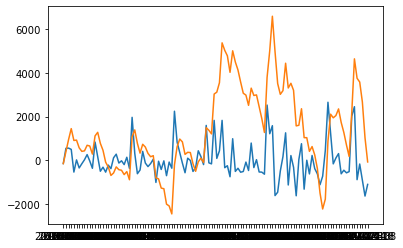

In [8]:
plt.plot(month_profit_loss['Year_month'], month_profit_loss['P&L'],month_profit_loss['cum_P&L'])
plt.show()